In [1]:
import pandas as pd
df = pd.read_csv('pollution_us_2000_2016.csv')

In [2]:
print(df)

         Unnamed: 0  State Code  County Code  Site Num  \
0                 0           4           13      3002   
1                 1           4           13      3002   
2                 2           4           13      3002   
3                 3           4           13      3002   
4                 4           4           13      3002   
...             ...         ...          ...       ...   
1746656       24599          56           21       100   
1746657       24600          56           21       100   
1746658       24601          56           21       100   
1746659       24602          56           21       100   
1746660       24603          56           21       100   

                                         Address    State    County  \
0        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
1        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
2        1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
3        1645 E ROO

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [4]:
print(df.describe())

         Unnamed: 0    State Code   County Code      Site Num      NO2 Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2 1st Max Value  NO2 1st Max Hour       NO2 AQI       O3 Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

In [5]:
df.isna().sum()

Unnamed: 0                0
State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Input
no2 = ctrl.Antecedent(np.arange(-5, 141, 1), 'NO2')
o3 = ctrl.Antecedent(np.arange(-1, 0.20, 0.01), 'O3')
so2 = ctrl.Antecedent(np.arange(-5, 323, 1), 'SO2')
co = ctrl.Antecedent(np.arange(-1, 9, 0.1), 'CO')

In [9]:
# Output 
health_risk = ctrl.Consequent(np.arange(0, 11, 1), 'health_risk')

In [10]:
# Kuartil dan Min Max NO2 Mean
q1=df['NO2 Mean'].quantile(0.25)
q2=df['NO2 Mean'].quantile(0.50)
q3=df['NO2 Mean'].quantile(0.75)
min_val = df['NO2 Mean'].min()
max_val = df['NO2 Mean'].max()

In [11]:
no2['low'] = fuzz.trimf(no2.universe, [min_val, min_val, q1])
no2['moderate'] = fuzz.trimf(no2.universe, [q1, q2, q3])
no2['high'] = fuzz.trimf(no2.universe, [q3, max_val, max_val])

In [12]:
# Kuartil dan Min Max 03 Mean
q1=df['O3 Mean'].quantile(0.25)
q2=df['O3 Mean'].quantile(0.50)
q3=df['O3 Mean'].quantile(0.75)
min_val = df['O3 Mean'].min()
max_val = df['O3 Mean'].max()

In [13]:
o3['low'] = fuzz.trimf(o3.universe, [min_val, min_val, q1])
o3['moderate'] = fuzz.trimf(o3.universe, [q1, q2, q3])
o3['high'] = fuzz.trimf(o3.universe, [q3, max_val, max_val])

In [14]:
# Kuartil dan Min Max SO2 Mean
q1=df['SO2 Mean'].quantile(0.25)
q2=df['SO2 Mean'].quantile(0.50)
q3=df['SO2 Mean'].quantile(0.75)
min_val = df['SO2 Mean'].min()
max_val = df['SO2 Mean'].max()

In [15]:
so2['low'] = fuzz.trimf(so2.universe, [min_val, min_val, q1])
so2['moderate'] = fuzz.trimf(so2.universe, [q1, q2, q3])
so2['high'] = fuzz.trimf(so2.universe, [q3, max_val, max_val])

In [16]:
# Kuartil dan Min Max CO Mean
q1=df['CO Mean'].quantile(0.25)
q2=df['CO Mean'].quantile(0.50)
q3=df['CO Mean'].quantile(0.75)
min_val = df['CO Mean'].min()
max_val = df['CO Mean'].max()

In [17]:
co['low'] = fuzz.trimf(co.universe, [min_val, min_val, q1])
co['moderate'] = fuzz.trimf(co.universe, [q1, q2, q3])
co['high'] = fuzz.trimf(co.universe, [q3, max_val, max_val])

In [18]:
health_risk['low'] = fuzz.trimf(health_risk.universe, [0, 0, 5])
health_risk['moderate'] = fuzz.trimf(health_risk.universe, [3, 5, 7])
health_risk['high'] = fuzz.trimf(health_risk.universe, [5, 10, 10])

In [19]:
rule1 = ctrl.Rule(so2['low'] & co['low'] & no2['low'] & o3['low'], health_risk['low'])
rule2 = ctrl.Rule(so2['moderate'] | co['moderate'], health_risk['moderate'])
rule3 = ctrl.Rule(no2['high'] | o3['high'], health_risk['high'])
rule4 = ctrl.Rule((so2['high'] & co['high']) | (no2['high'] & o3['moderate']), health_risk['high'])

In [20]:
pollution_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(pollution_ctrl)

In [21]:
simulator.input['NO2'] = 20
simulator.input['O3'] = 25
simulator.input['SO2'] = 5
simulator.input['CO'] = 0.8

In [22]:
simulator.compute()

C:\Users\Alma\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


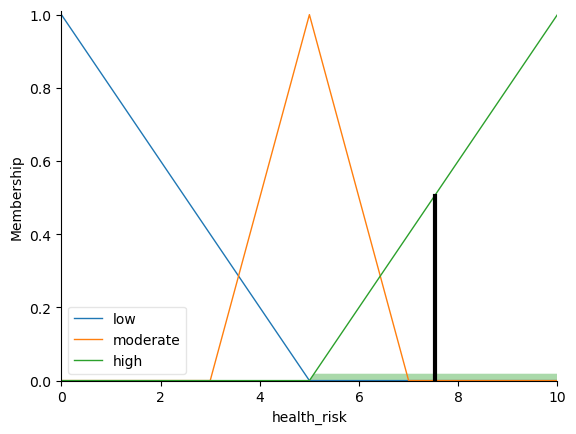

In [23]:
health_risk.view(sim=simulator)
plt.show()

In [25]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm 

threshold_risk = 5 

# INIT list
y_true = []
y_pred = []

for i in tqdm(range(len(df))):
    try:
        # Input ke simulator
        simulator.input['NO2'] = df['NO2 Mean'].iloc[i]
        simulator.input['O3'] = df['O3 Mean'].iloc[i]
        simulator.input['SO2'] = df['SO2 Mean'].iloc[i]
        simulator.input['CO'] = df['CO Mean'].iloc[i]
        
        simulator.compute()

        # Actual risk (ground truth)
        actual = 1 if df['O3 AQI'].iloc[i] > 50 and df['SO2 AQI'].iloc[i] > 60 else 0

        # Predicted risk → pakai threshold sesuai MF
        output_value = simulator.output['health_risk']

        if output_value > threshold_risk:
            predicted = 1
        else:
            predicted = 0

        # Append
        y_true.append(actual)
        y_pred.append(predicted)

    except Exception as e:
        print(f"Error at row {i}: {e}")
        continue 

score = f1_score(y_true, y_pred)
akurasi = accuracy_score(y_true, y_pred)

print("F1-score:", score)
print("Accuracy:", akurasi)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk (0)", "High Risk (1)"])
disp.plot()

  0%|                                                                            | 511/436876 [00:01<19:35, 371.07it/s]

Error at row 469: 'health_risk'
Error at row 481: 'health_risk'


  0%|▏                                                                           | 926/436876 [00:02<19:46, 367.44it/s]

Error at row 873: 'health_risk'


  0%|▏                                                                          | 1146/436876 [00:03<20:32, 353.65it/s]

Error at row 1096: 'health_risk'


  1%|▍                                                                          | 2575/436876 [00:07<20:21, 355.51it/s]

Error at row 2526: 'health_risk'


  1%|▊                                                                          | 4545/436876 [00:13<20:12, 356.43it/s]

Error at row 4498: 'health_risk'
Error at row 4499: 'health_risk'


  1%|▊                                                                          | 4652/436876 [00:13<20:57, 343.63it/s]

Error at row 4589: 'health_risk'


  1%|▊                                                                          | 4723/436876 [00:14<21:07, 341.00it/s]

Error at row 4684: 'health_risk'
Error at row 4688: 'health_risk'
Error at row 4706: 'health_risk'
Error at row 4710: 'health_risk'
Error at row 4717: 'health_risk'
Error at row 4724: 'health_risk'
Error at row 4754: 'health_risk'


  1%|▊                                                                          | 5091/436876 [00:15<20:01, 359.41it/s]

Error at row 5024: 'health_risk'
Error at row 5085: 'health_risk'


  1%|▉                                                                          | 5163/436876 [00:15<20:30, 350.86it/s]

Error at row 5114: 'health_risk'
Error at row 5138: 'health_risk'
Error at row 5153: 'health_risk'
Error at row 5175: 'health_risk'


  1%|▉                                                                          | 5236/436876 [00:15<21:17, 337.77it/s]

Error at row 5199: 'health_risk'


  1%|▉                                                                          | 5566/436876 [00:16<19:41, 364.93it/s]

Error at row 5510: 'health_risk'


  1%|█                                                                          | 5934/436876 [00:17<20:36, 348.56it/s]

Error at row 5864: 'health_risk'


  2%|█▎                                                                         | 7458/436876 [00:22<22:15, 321.51it/s]

Error at row 7426: 'health_risk'


  2%|█▎                                                                         | 7609/436876 [00:22<29:47, 240.16it/s]

Error at row 7563: 'health_risk'
Error at row 7600: 'health_risk'
Error at row 7601: 'health_risk'
Error at row 7603: 'health_risk'
Error at row 7605: 'health_risk'
Error at row 7608: 'health_risk'
Error at row 7614: 'health_risk'
Error at row 7615: 'health_risk'


  2%|█▎                                                                         | 7665/436876 [00:23<28:33, 250.48it/s]

Error at row 7625: 'health_risk'
Error at row 7628: 'health_risk'
Error at row 7629: 'health_risk'
Error at row 7632: 'health_risk'
Error at row 7636: 'health_risk'
Error at row 7637: 'health_risk'
Error at row 7638: 'health_risk'
Error at row 7639: 'health_risk'
Error at row 7663: 'health_risk'
Error at row 7670: 'health_risk'
Error at row 7682: 'health_risk'


  2%|█▎                                                                         | 7754/436876 [00:23<21:33, 331.76it/s]


Error at row 7740: 'health_risk'
Error at row 7753: 'health_risk'


KeyboardInterrupt: 